# Davidson & MacKinnon. Econometric Theory and Methods. (1999)
## Exercise 4.24.
### Using the file classical.data, which contains 50 observations on three variables, estimate the regression model $$y=\beta_1\iota+\beta_2x_2+\beta_2x_3+u, \, u \sim N(0,\sigma^2I).$$ Compute a t statistic for the null hypothesis that 𝛽3=0. On the basis of this test statistic, perform an exact test. Then perform parametric and semiparametric bootstrap tests using 99, 999, and 9999 simulations. How do the two types of bootstrap P values correspond with the exact P value? How does this correspondence change as B increases?


We'll load "classical.data.txt" (provided by the authors in http://qed.econ.queensu.ca/ETM/data/), generate the regression $$y=\beta_1\iota+\beta_2x_2+\beta_2x_3+u, \, u \sim N(0,\sigma^2I),$$ then get the values of its coefficients and compute the $t$-statistic and the $p$-value. This will be the exact test.


In [1]:
# Load classical.data.txt
data = read.table("classical.data.txt",col.names=c("n","y","x2","x3"))

#Regression
reg = lm(y ~ x2 + x3, data); summary(reg)

#Computing t-statistic and testing null hypothesis H_0: beta3 = 0
coeff = summary(reg)$coefficients
beta1 = coeff["(Intercept)", "Estimate"]
beta2 = coeff["x2", "Estimate"]
beta3 = coeff["x3", "Estimate"]
sd_x3 = coeff["x3", "Std. Error"]

t_value = beta3 / sd_x3 ; print(paste("x3 t-value:",t_value))
p_value = 2 * pt(-abs(t_value), df=nrow(data)-3) ; print(paste("x3 p-value:",p_value))


Call:
lm(formula = y ~ x2 + x3, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3678 -0.4788  0.0544  0.5083  2.0062 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.09491    0.19762  25.781  < 2e-16 ***
x2           1.13487    0.14083   8.058 2.09e-10 ***
x3           0.22206    0.09454   2.349   0.0231 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9165 on 47 degrees of freedom
Multiple R-squared:  0.7436,	Adjusted R-squared:  0.7327 
F-statistic: 68.16 on 2 and 47 DF,  p-value: 1.285e-14


[1] "x3 t-value: 2.34872301579707"
[1] "x3 p-value: 0.0230946473405809"


Now, we'll begin by setting 99 simulations and then generate the residuals by computing a regression without the variable $x_3$, since we'll be testing the nulll hypothesis where $\beta_3=0$.

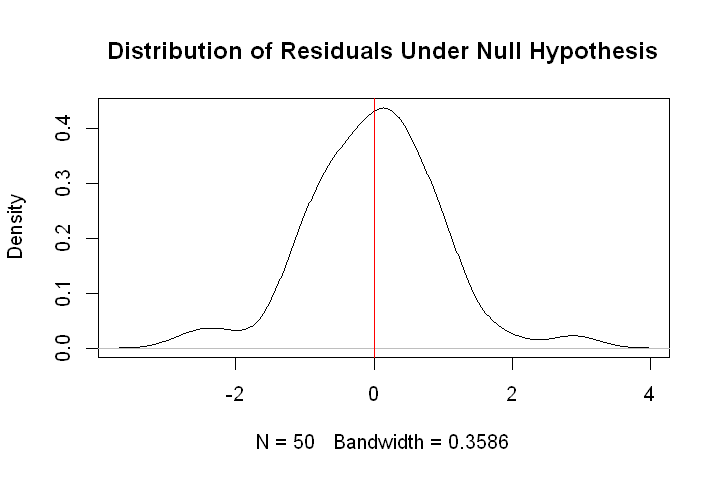

In [2]:
#Bootstrap t-test
result_table = NULL #Table to compare results
result_table = cbind(p_value)
n = nrow(data) # number of observations
B = 99 #number of simulations

#Regression under null hypothesis
reg_null = lm(y ~ x2, data)
reg_residual = reg_null$residuals
sd_null = summary(reg_null)$sigma

options(repr.plot.width=6, repr.plot.height=4)
plot(density(reg_residual), main="Distribution of Residuals Under Null Hypothesis")
abline(v=mean(reg_residual),col="red")


Now, we'll perform first the Semiparametric Bootstrap, where we don't assume a distribuition in the residual and,then, by running 99 simulations we'll create a distribuition of $t$-statistics and compute the $p$-value by its mean.


        p_value p_value_boot_sp  B
[1,] 0.02309465      0.01946501 99


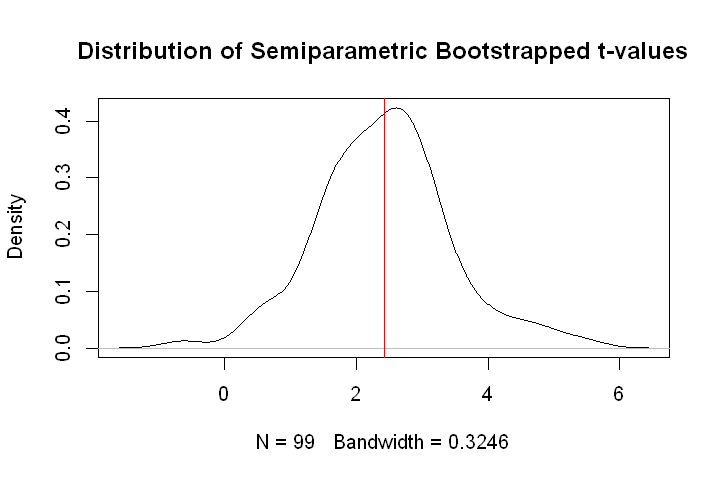

In [3]:
#Semiparametric Bootstrap
set.seed(1234) # setting seed for reproducible results  
t_boot_sp = NULL #vector to input semiparametric bootstrapped t-values

for (i in 1:B){
residual_boot_sp = sample(reg_residual, n, replace = TRUE)
y_boot_sp = beta1 + beta2*data$x2 + beta3*data$x3 + residual_boot_sp
reg_boot_sp = lm(y_boot_sp ~ x2 + x3, data)
coeff_boot_sp = summary(reg_boot_sp)$coefficients
beta3_boot_sp = coeff_boot_sp["x3", "Estimate"]
sd_x3_boot_sp = coeff_boot_sp["x3", "Std. Error"]
t_boot_sp = rbind(t_boot_sp, beta3_boot_sp/sd_x3_boot_sp)
}

options(repr.plot.width=6, repr.plot.height=4)
plot(density(t_boot_sp), main="Distribution of Semiparametric Bootstrapped t-values")
abline(v=mean(t_boot_sp),col="red")

p_value_boot_sp = 2 * pt(-abs(mean(t_boot_sp)), df=nrow(data)-3) 
result_table = cbind(result_table, p_value_boot_sp) ; print(cbind(result_table, "B"=99))


Finally, we'll perform a Parametric Bootstrap, where we assume a normal distribuition of the residuals with mean 0. Then, by running 99 simulations we'll create a distribuition of $t$-statistics and compute the $p$-value by its mean.


        p_value p_value_boot_sp p_value_boot_p  B
[1,] 0.02309465      0.01946501     0.02422979 99


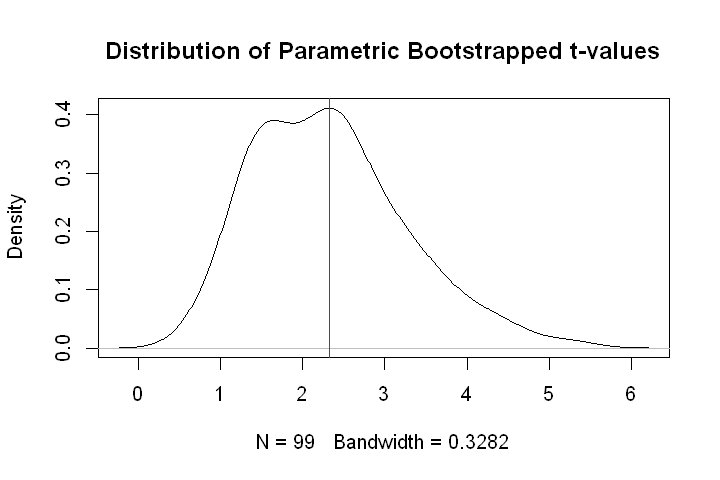

In [4]:
#Parametric Bootstrap - considering the residuals have normal distribution with mean 0
t_boot_p = NULL #vector to input semiparametric bootstrapped t-values
for (i in 1:B){
residual_boot_p = rnorm(n, 0, sd=sd_null)
y_boot_p = beta1 + beta2*data$x2 + beta3*data$x3 + residual_boot_p
reg_boot_p = lm(y_boot_p ~ x2 + x3, data)
coeff_boot_p = summary(reg_boot_p)$coefficients
beta3_boot_p = coeff_boot_p["x3", "Estimate"]
sd_x3_boot_p = coeff_boot_p["x3", "Std. Error"]
t_boot_p = rbind(t_boot_p, beta3_boot_p/sd_x3_boot_p)
}

options(repr.plot.width=6, repr.plot.height=4)
plot(density(t_boot_p), main="Distribution of Parametric Bootstrapped t-values")
abline(v=mean(t_boot_p),col="red")

p_value_boot_p = 2 * pt(-abs(mean(t_boot_p)), df=nrow(data)-3) 

result_table = cbind(result_table, p_value_boot_p) ; print(cbind(result_table, "B"=99))

Now, we'll run the Parametric and Semiparametric Bootstraps again for $B$ = 99, 999, 9999 simulations and compare its $p$-values.

In [5]:
#Bootstrap t-test
for (j in c(99,999,9999)){
  result_table = NULL #Table to compare results
  result_table = cbind(p_value)
  n = nrow(data) # number of observations
  B = j #number of simulations
  
  #Regression under null hypothesis
  reg_null = lm(y ~ x2, data)
  reg_residual = reg_null$residuals
  sd_y_null = summary(reg_null)$sigma
  
  
  #Semiparametric Bootstrap
  set.seed(1234) # setting seed for reproducible results  
  t_boot_sp = NULL #vector to input semiparametric bootstrapped t-values
  
  for (i in 1:B){
    residual_boot_sp = sample(reg_residual, n, replace = TRUE)
    y_boot_sp = beta1 + beta2*data$x2 + beta3*data$x3 + residual_boot_sp
    reg_boot_sp = lm(y_boot_sp ~ x2 + x3, data)
    coeff_boot_sp = summary(reg_boot_sp)$coefficients
    beta3_boot_sp = coeff_boot_sp["x3", "Estimate"]
    sd_x3_boot_sp = coeff_boot_sp["x3", "Std. Error"]
    t_boot_sp = rbind(t_boot_sp, beta3_boot_sp/sd_x3_boot_sp)
  }
  
  p_value_boot_sp = 2 * pt(-abs(mean(t_boot_sp)), df=nrow(data)-3) 
  result_table = cbind(result_table, p_value_boot_sp)
  
  
  #Parametric Bootstrap - considering the residuals have normal distribution with mean 0
  t_boot_p = NULL #vector to input semiparametric bootstrapped t-values
  for (i in 1:B){
    residual_boot_p = rnorm(n, 0, sd=sd_null)
    y_boot_p = beta1 + beta2*data$x2 + beta3*data$x3 + residual_boot_p
    reg_boot_p = lm(y_boot_p ~ x2 + x3, data)
    coeff_boot_p = summary(reg_boot_p)$coefficients
    beta3_boot_p = coeff_boot_p["x3", "Estimate"]
    sd_x3_boot_p = coeff_boot_p["x3", "Std. Error"]
    t_boot_p = rbind(t_boot_p, beta3_boot_p/sd_x3_boot_p)
  }
  
  p_value_boot_p = 2 * pt(-abs(mean(t_boot_p)), df=nrow(data)-3) 
  result_table = cbind(result_table, p_value_boot_p) ; print(cbind(result_table, "B"=B))
    
}

        p_value p_value_boot_sp p_value_boot_p  B
[1,] 0.02309465      0.01946501     0.02422979 99
        p_value p_value_boot_sp p_value_boot_p   B
[1,] 0.02309465       0.0208596     0.02873442 999
        p_value p_value_boot_sp p_value_boot_p    B
[1,] 0.02309465      0.02309937     0.02577165 9999



Note that the exact $p$-value isn't affect by the number of simulations, since it was calculated before using the Bootstrap method. The semiparametric $p$-values converged to the actual $p$-value by increasing the number of simulations (when $B$ = 9999, the value is really close) and the parametric $p$-values didn't converge to the actual $p$-value.
